In [90]:
import pickle

with open('dataframe.pkl', 'rb') as file:
    df = pickle.load(file)

## EDA Rapide

In [91]:
import matplotlib.pyplot as plt

In [92]:
df.head()

,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,...,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Year,Month,Day,Hour,Minute,Second
0,0,20.00,2017-02-01 07:32:14,1,0,0,0,551,0.000000,0.000000,...,4.0,20.00,0.00,27134,2017,2,1,7,32,14
1,0,20.00,2017-02-01 07:43:37,1,0,0,0,551,0.000000,0.000000,...,4.0,28.61,8.61,27817,2017,2,1,7,43,37
2,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,0.000000,0.000000,...,4.0,57.64,0.00,28058,2017,2,1,7,47,38
3,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,0.000000,0.000000,...,4.0,54.29,0.00,28128,2017,2,1,7,48,48
4,0,26.90,2017-02-01 08:13:27,1,0,0,0,549,0.003769,8.586333,...,4.0,59.15,32.25,29607,2017,2,1,8,13,27


In [93]:
import pandas as pd

table_frequence = df['FlagImpaye'].value_counts()

# Convertissez la série en DataFrame pour une meilleure présentation
table_frequence_df = pd.DataFrame(table_frequence)

# Donnez un nom approprié à la colonne
table_frequence_df.columns = ['Fréquence']

table_frequence_df['Fréquence'] = table_frequence_df['Fréquence'] / table_frequence_df['Fréquence'].sum()
# Affichez le DataFrame de la table de fréquence
print(table_frequence_df)


            Fréquence
FlagImpaye           
0            0.993545
1            0.006455


<Axes: title={'center': 'Count (target)'}, xlabel='FlagImpaye'>

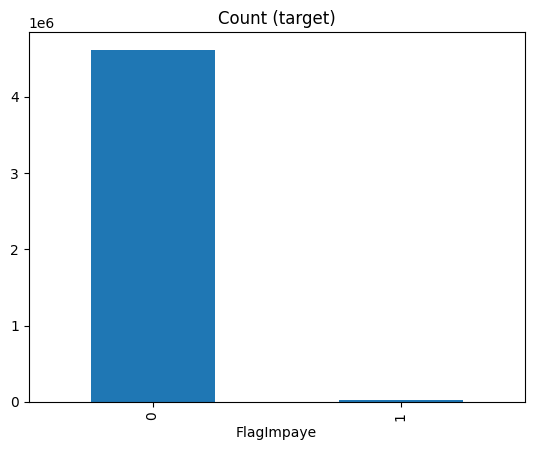

In [94]:
table_frequence.plot(kind='bar', title='Count (target)')

Les données sont fortements déséquilibrées pour la valeur cible 'FlagImpaye'

In [95]:
df.dtypes

FlagImpaye               category
Montant                   float64
DateTransaction    datetime64[ns]
CodeDecision               object
VerifianceCPT1              int32
VerifianceCPT2              int32
VerifianceCPT3              int32
D2CB                        int32
ScoringFP1                float64
ScoringFP2                float64
ScoringFP3                float64
TauxImpNb_RB              float64
TauxImpNB_CPM             float64
EcartNumCheq                int32
NbrMagasin3J                int32
DiffDateTr1               float64
DiffDateTr2               float64
DiffDateTr3               float64
CA3TRetMtt                float64
CA3TR                     float64
Heure                       int32
Year                        int32
Month                       int32
Day                         int32
Hour                        int32
Minute                      int32
Second                      int32
dtype: object

### Je veux diminuer la taille du dataframe car il est bcp trop lourd. Je garde la même proportion de classe de 'FlagImpaye'

In [96]:
from sklearn.model_selection import train_test_split

# Séparez les données en fonction de la variable 'Flagimpaye'
df_pas_utilise, df_reduit = train_test_split(df, test_size=0.1, stratify=df['FlagImpaye'], random_state=42)

# Affichez la taille du sous-DataFrame de test pour vérifier
print("Taille du sous-DataFrame de test :", len(df_reduit))


Taille du sous-DataFrame de test : 464678


In [97]:
table_frequence = df_reduit['FlagImpaye'].value_counts()

# Convertissez la série en DataFrame pour une meilleure présentation
table_frequence_df = pd.DataFrame(table_frequence)

# Donnez un nom approprié à la colonne
table_frequence_df.columns = ['Fréquence']

table_frequence_df['Fréquence'] = table_frequence_df['Fréquence'] / table_frequence_df['Fréquence'].sum()
# Affichez le DataFrame de la table de fréquence
print(table_frequence_df)

            Fréquence
FlagImpaye           
0            0.993544
1            0.006456


In [102]:
df_reduit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464678 entries, 1628857 to 3285815
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   FlagImpaye       464678 non-null  category      
 1   Montant          464678 non-null  float64       
 2   DateTransaction  464678 non-null  datetime64[ns]
 3   CodeDecision     464678 non-null  object        
 4   VerifianceCPT1   464678 non-null  int32         
 5   VerifianceCPT2   464678 non-null  int32         
 6   VerifianceCPT3   464678 non-null  int32         
 7   D2CB             464678 non-null  int32         
 8   ScoringFP1       464678 non-null  float64       
 9   ScoringFP2       464678 non-null  float64       
 10  ScoringFP3       464678 non-null  float64       
 11  TauxImpNb_RB     464678 non-null  float64       
 12  TauxImpNB_CPM    464678 non-null  float64       
 13  EcartNumCheq     464678 non-null  int32         
 14  NbrMagasin3J     4

### On définit la partie Train et Test

In [98]:
# Définition des dates limites pour les ensembles d'apprentissage et de test
train_inf = '2017-02-01'
train_sup = '2017-08-31'
test_inf = '2017-09-01'
test_sup = '2017-11-30'

In [99]:
train = df_reduit.loc[(df_reduit['DateTransaction'] >= train_inf) & (df_reduit['DateTransaction'] <= train_sup)]
X_train = train.drop(columns=['FlagImpaye','CodeDecision'])
y_train = train['FlagImpaye']

In [100]:
test = df_reduit.loc[(df_reduit['DateTransaction'] >= test_inf) & (df_reduit['DateTransaction'] <= test_sup)]
X_test = test.drop(columns=['FlagImpaye','CodeDecision'])
y_test = test['FlagImpaye']

In [101]:
# on enleve 'DateTransaction' qui ne nous sert plus
X_train = X_train.drop(columns=['DateTransaction'])
X_test = X_test.drop(columns=['DateTransaction'])

In [109]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388491 entries, 1628857 to 3285815
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Montant         388491 non-null  float64
 1   VerifianceCPT1  388491 non-null  int32  
 2   VerifianceCPT2  388491 non-null  int32  
 3   VerifianceCPT3  388491 non-null  int32  
 4   D2CB            388491 non-null  int32  
 5   ScoringFP1      388491 non-null  float64
 6   ScoringFP2      388491 non-null  float64
 7   ScoringFP3      388491 non-null  float64
 8   TauxImpNb_RB    388491 non-null  float64
 9   TauxImpNB_CPM   388491 non-null  float64
 10  EcartNumCheq    388491 non-null  int32  
 11  NbrMagasin3J    388491 non-null  int32  
 12  DiffDateTr1     388491 non-null  float64
 13  DiffDateTr2     388491 non-null  float64
 14  DiffDateTr3     388491 non-null  float64
 15  CA3TRetMtt      388491 non-null  float64
 16  CA3TR           388491 non-null  float64
 17  Heure   

In [111]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 388491 entries, 1628857 to 3285815
Series name: FlagImpaye
Non-Null Count   Dtype   
--------------   -----   
388491 non-null  category
dtypes: category(1)
memory usage: 3.3 MB


## Modèles suppervisés

### Decision tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score


model_DecisionTreeClassifier = DecisionTreeClassifier()

#### Decision tree avec le Random Over-Sampling

In [123]:
# Entraîner le modèle sur l'ensemble d'entraînement
model_DecisionTreeClassifier.fit(X_train_ros, y_train_ros)

# Faire des prédictions sur l'ensemble de test
y_pred = model_DecisionTreeClassifier.predict(X_test)

# Évaluer les performances du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.04980544747081712


#### Decision tree avec SMOTE

In [124]:
# Entraîner le modèle sur l'ensemble d'entraînement
model_DecisionTreeClassifier.fit(X_train_smote, y_train_smote)

# Faire des prédictions sur l'ensemble de test
y_pred = model_DecisionTreeClassifier.predict(X_test)

# Évaluer les performances du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.03350151362260344


#### Decision Tree avec ADASYN

In [125]:
model_DecisionTreeClassifier.fit(X_train_adasyn, y_train_adasyn)

# Faire des prédictions sur l'ensemble de test
y_pred = model_DecisionTreeClassifier.predict(X_test)

# Évaluer les performances du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.03461205653302567


### Greedsearch du decision tree avec chaque méthode d'échantillonage

#### Greedsearch decision tree avec Random-Over Sampling

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Suréchantillonnage
ros = RandomOverSampler(sampling_strategy=0.01)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Modèle de l'arbre de décision
dt_classifier = DecisionTreeClassifier()

# Pipeline
pipeline = Pipeline([
    ('classifier', dt_classifier)
])

# Paramètres pour la recherche sur la grille
param_grid = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 4]
}

# Recherche sur la grille
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_ros, y_train_ros)

# Afficher les meilleurs paramètres et le meilleur score F1
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score F1:", grid_search.best_score_)



Meilleurs paramètres: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Meilleur score F1: 0.2159163417378213


In [138]:
y_pred = grid_search.predict(X_test)

# Évaluer les performances du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.05270457697642164


In [141]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[72015,  1428],
       [  621,    57]], dtype=int64)

#### Greedsearch decision tree avec SMOTE

In [142]:
# Suréchantillonnage
smote = SMOTE(sampling_strategy=0.1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Modèle de l'arbre de décision
dt_classifier = DecisionTreeClassifier()

# Pipeline
pipeline = Pipeline([
    ('classifier', dt_classifier)
])

# Paramètres pour la recherche sur la grille
param_grid = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 4]
}

# Recherche sur la grille
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_smote, y_train_smote)

# Afficher les meilleurs paramètres et le meilleur score F1
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score F1:", grid_search.best_score_)

Meilleurs paramètres: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Meilleur score F1: 0.7529430064409663


In [143]:
y_pred = grid_search.predict(X_test)

# Évaluer les performances du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.05735204392922514


In [144]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[70937,  2506],
       [  584,    94]], dtype=int64)

#### Greedsearch decision tree avec ADASYN

In [134]:
# Suréchantillonnage
X_train_adasyn, y_train_adasyn = ADASYN(sampling_strategy=0.1).fit_resample(X_train, y_train)

# Modèle de l'arbre de décision
dt_classifier = DecisionTreeClassifier()

# Pipeline
pipeline = Pipeline([
    ('classifier', dt_classifier)
])

# Paramètres pour la recherche sur la grille
param_grid = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 4]
}

# Recherche sur la grille
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_smote, y_train_smote)

# Afficher les meilleurs paramètres et le meilleur score F1
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score F1:", grid_search.best_score_)

Meilleurs paramètres: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Meilleur score F1: 0.8762673480649331


In [135]:
y_pred = grid_search.predict(X_test)

# Évaluer les performances du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.0326734576206035


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

### Greedsearch du random Forest avec chaque méthode d'échantillonage

##### Greeddsearch random forest avec Random over sampling

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


# Suréchantillonnage
ros = RandomOverSampler(sampling_strategy=0.1)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Modèle de l'arbre de décision
rf_classifier = RandomForestClassifier()

# Pipeline
pipeline = Pipeline([
    ('classifier', rf_classifier)
])

# Paramètres pour la recherche sur la grille
param_grid = {
    'classifier__n_estimators': [50],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 4]
}

# Recherche sur la grille
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_ros, y_train_ros)

# Afficher les meilleurs paramètres et le meilleur score F1
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score F1:", grid_search.best_score_)

Meilleurs paramètres: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}
Meilleur score F1: 0.6772828768062791


In [152]:
y_pred = grid_search.predict(X_test)

# Évaluer les performances du modèle
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.9863710085180319


In [153]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[73352,    91],
       [  655,    23]], dtype=int64)

Il faut se concentrer sur la confusion matrix et les poids associés plutot que sur le f1 score. 